In [448]:
import numpy as np
import scipy as sci
from PIL import Image

import scipy.fft as fft

import matplotlib.pyplot as plt

import cv2 as cv

# FUNCTION`S CREATED FROM   'INTRO'
def middle_section(arr):
    """
    for plt.plot. Can be colored or not.
    """
    mid_row=int((arr.shape)[0]/2)
    if len(arr.shape) == 3 :
        return (arr[mid_row,:,0:1]).flatten()
    else:
        return((arr[mid_row,:]).flatten())
def convolve_2d(arr,flt):
    """
    filter designed to be 3x3
    """
    conv=np.empty(((arr.shape)[0]-2,(arr.shape)[1]-2))
    for i in (range(arr.shape[0]))[1:-1]:
        in1=np.convolve(arr[i-0,:],flt[0,:],'valid')
        in2=np.convolve(arr[i,:],flt[1,:],'valid')
        in3=np.convolve(arr[i+1,:],flt[2,:],'valid')
        conv[i-1,:]=(in1+in2+in3)
    return conv

def im_asrankn(arr,n):
    """
    pull the first n rank-1 part of the array. with SVD.
    designed for NON-colored image
    """
    U,E,V=np.linalg.svd(arr)
    ans=np.zeros(arr.shape)
    for i in range(n):
        ans+=(U[:,i:i+1]@V[i:i+1,:])*E[i]
    return ans
def gaussian_filter2d(piv,mean=0,sigma=1):
    loc=np.square((np.arange(-(piv-1)/2,((piv-1)/2)+1)).reshape((piv,1)))
    temp=np.concatenate(piv*[loc],axis=1)
    x=temp+temp.T
    z=(1/((2*np.pi)*(sigma**2)))*np.exp((-1*np.square(x-mean))/(2*np.square(sigma)))
    return z/np.linalg.norm(z)

def hough_transform(image):
    teta=np.linspace(-np.pi/2,np.pi/2,180)
    width, height = image.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height)).astype('int16')
    hough_space=np.zeros((diag_len*2,len(teta)))
    row,col=np.where(image==1)
    for x,y in list(zip(col,row)):
        d=(np.round(y*np.cos(teta)-x*np.sin(teta)))+diag_len
        coor=np.column_stack((d,np.arange(len(teta)))).astype('int32')
        for i in range(len(teta)):
            hough_space[tuple(coor[i])]+=1
    return (hough_space,diag_len,teta)
    
rng=np.random.default_rng(seed=42)

ccarr1=Image.open('street.jpg')

In [2]:
d1cc=np.mean(ccarr1,-1)

In [3]:
d1cc=(d1cc-d1cc.mean())/d1cc.std()


/tmp/ipykernel_1415/4142714934.py:1: DeprecationWarning: Please use `gaussian_laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  derivative=sci.ndimage.filters.gaussian_laplace(d1cc,sigma=0.7)


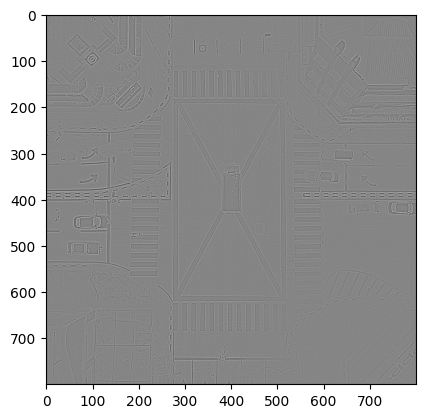

In [428]:
derivative=sci.ndimage.filters.gaussian_laplace(d1cc,sigma=0.7)
plt.imshow(derivative,cmap='gray')

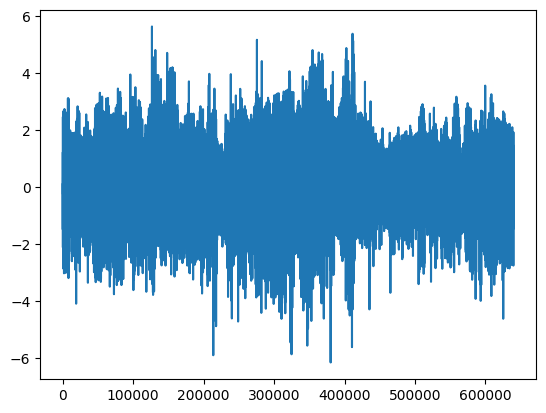

In [429]:
plt.plot(derivative.ravel())

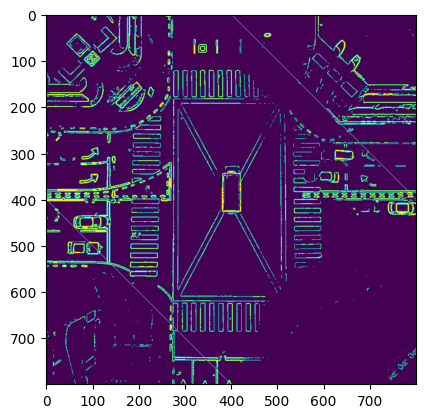

In [357]:
treshold=np.where(derivative>0.5,1,0)
temp=np.zeros(800)
temp[400]=1
temp=sci.linalg.circulant(temp)
treshold=treshold+temp
treshold=np.where(treshold==2,1,treshold)
plt.imshow(treshold)

In [447]:
def hough_transform(image):
    teta=np.linspace(-np.pi/2,np.pi/2,180)
    width, height = image.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height)).astype('int16')
    hough_space=np.zeros((diag_len*2,len(teta)))
    row,col=np.where(image==1)
    for x,y in list(zip(col,row)):
        d=(np.round(y*np.cos(teta)-x*np.sin(teta)))+diag_len
        coor=np.column_stack((d,np.arange(len(teta)))).astype('int32')
        for i in range(len(teta)):
            hough_space[tuple(coor[i])]+=1
    return (hough_space,diag_len,teta)
    

In [367]:
lines=hough_transform(treshold)

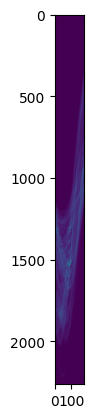

In [368]:
plt.imshow((lines))

In [388]:
#new approach
signal=np.zeros(400).reshape((20,20))
signal[6,16]=1
signal[15,10]=1

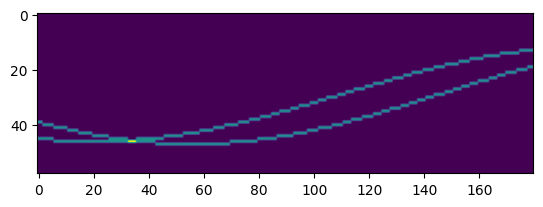

In [437]:
line,max_dist,teta=hough_transform(signal)
plt.imshow((line))